In [1]:
from skimage.io import imread
from pathlib import Path
from iaf.plot import imshow
from iaf.notebook import init_style
init_style()

# Iterative thresholding

Example implementation of the iterative thresholding algorithm.

In [2]:
def iterative_threshold(img, t):
    """Implements iterative thresholding.
    
    @param img: Image to be segmented (numpy array)
    @param t  : Initial threshold (float)
    
    @return Tuple of black-and-white image and final threshold value.
    """

    # Make sure the initial threshold t does not give empty sets
    mx = img.max()
    mn = img.min()

    if t >= mx or t < mn:
        t = (mn + mx) / 2 
        print(f"The initial threshold was outside the dynamic "
              "range of the image and was reset to {t}.")

    # This is the actual algorithm
    tlast = t + 1.0

    while abs(t - tlast) > 0.5:

        # Get the two subsets
        G1 = img[img > t]
        G2 = img[img <= t]

        # Calculate the means
        m1 = G1.mean()
        m2 = G2.mean()
        
        # Calculate the new threshold (but first store last value)
        tlast = t
        t = (m1 + m2) / 2

    # Segment with the calculated threshold
    BW = img > t
    
    # Return black-and-white mask and last value of t
    return BW, t

## Test on example image

In [3]:
# Read the example image 
img = imread(Path(Path.home() / "openbis/raw_data/20240916113758953-89/original/notebooks_data/neuron.tif"))

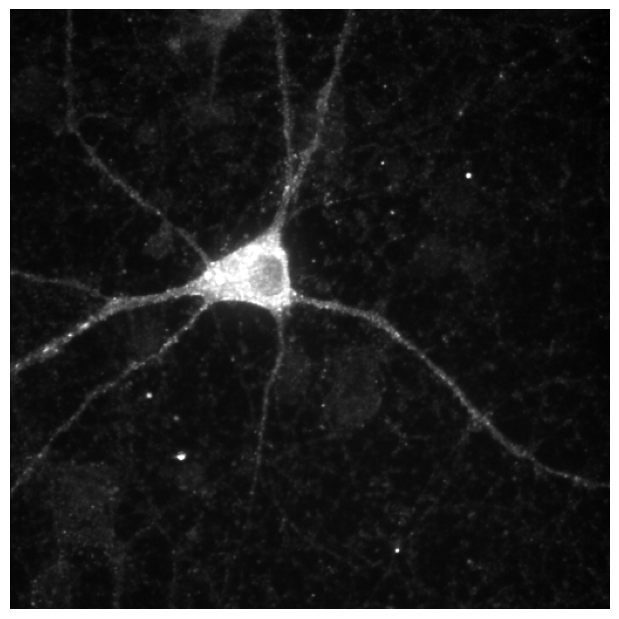

In [4]:
# Show image
imshow(img, auto_stretch=True)

In [5]:
# Our initial t is set to 128; try other values!
BW, t = iterative_threshold(img, 128)  

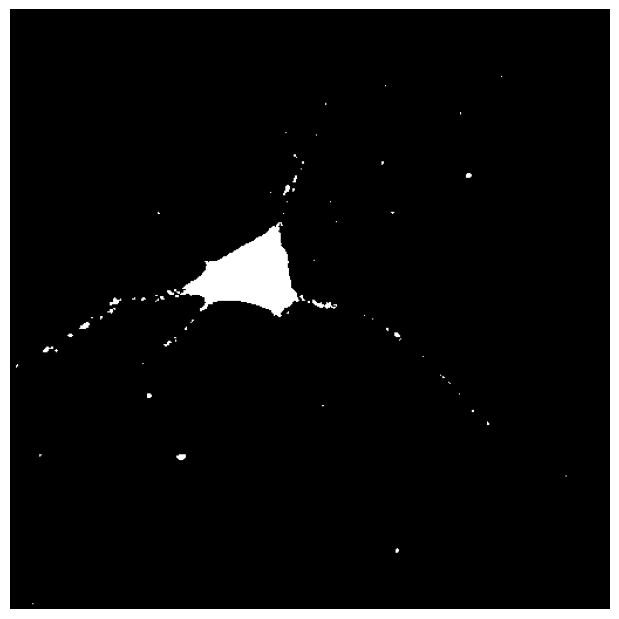

In [6]:
# Show image and black-and-white mask
imshow(BW)

In [7]:
# Print the final threshold
print(f"The final threshold is t = {t}.")

The final threshold is t = 107.10019337480395.
